<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/main/TP_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP: Random Forests  


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 

Lien Github:
https://github.com/BillTanekeu/TP-TPE-INF-3236-Groupe-8

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
import scipy.stats as sps

IMPORTATION des bibliothèques nécessaires aux différents traitements 

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()


Saving mushrooms.csv to mushrooms.csv


In [ ]:
import pandas as pd 
import io 
#importation du jeu de donnee  
dataset = pd.read_csv(io.BytesIO(uploaded['mushrooms.csv']))
dataset = dataset.sample(frac=1)


importation du jeu de données sur les champignons(mushrooms.csv)
Cet ensemble de données comprend des descriptions d'échantillons hypothétiques correspondant à 23 espèces de champignons branchiaux de la famille des champignons Agaricus et Lepiota tirés du guide de terrain de la société Audubon sur les champignons nord-américains (1981). Chaque espèce est identifiée comme définitivement comestible, définitivement vénéneuse, ou de comestibilité inconnue et déconseillée. Cette dernière classe a été combinée avec celle vénéneuse. Le Guide indique clairement qu'il n'y a pas de règle simple pour déterminer la comestibilité d'un champignon ; pas de règle comme "dépliants trois, que ce soit" pour Poisonous Oak et Ivy. 

In [ ]:
dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor',
                   'gill-attachment','gill-spacing',
'gill-size',
'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
'habitat']

Attribution des noms aux différentes colonnes  de notre dataset 

In [ ]:
dataset.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7004,e,k,s,w,f,n,f,w,b,g,...,k,w,w,p,w,t,p,w,n,g
5209,p,x,s,g,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,s,u
4454,p,x,y,g,f,f,f,c,b,p,...,k,p,n,p,w,o,l,h,v,p
7459,e,b,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,y,c,l
1654,e,x,s,g,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,s,g


Vue de l'en-tête de notre jeu de données 

définition de la fonction d'entropie, qui calcule l'entropie  pour chaque variable en se servant de la variable cible passée en paramètre. pour chacune des variables distinctes , elle somme ses sous attributs en fonctions des valeurs de la cible. l'entropie est égale à -somme(du produit de chaque fraction par le log2(-fraction)) ceci pour chaque variable. 

In [ ]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [ ]:
def InfoGain(data,split_attribute_name,target_name="target"):
#Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
#Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
#Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

fonction qui calcule Le gain d'information pour une variable de division donnée comme paramètre. ce gain est calculé comme étant la différence entre l'entropie totale du jeu et l'entropie de la variable considérée.

In [ ]:
def ID3(data,originaldata,features,target_attribute_name="target",parent_node_class = None):
#Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
#If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]        
    elif len(features) ==0:
        return parent_node_class
    else:
#Set the default value for this node --> The mode target feature value of the current node 
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
#Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] 
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
        return(tree)

In [ ]:
def predict(query,tree,default = 'p'):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [ ]:
def train_test_split(dataset):
    training_data = dataset.iloc[:round(0.75*len(dataset))].reset_index(drop=True)
    testing_data = dataset.iloc[round(0.75*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1]

In [ ]:
def RandomForest_Train(dataset,number_of_Trees):
    random_forest_sub_tree = []
    for i in range(number_of_Trees):
        bootstrap_sample = dataset.sample(frac=1,replace=True)
        bootstrap_training_data = train_test_split(bootstrap_sample)[0]
        bootstrap_testing_data = train_test_split(bootstrap_sample)[1]
        random_forest_sub_tree.append(ID3(bootstrap_training_data,bootstrap_training_data,bootstrap_training_data.drop(labels=['target'],axis=1).columns))
    return random_forest_sub_tree
random_forest = RandomForest_Train(dataset,50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
def RandomForest_Predict(query,random_forest,default='p'):
    predictions = []
    for tree in random_forest:
        predictions.append(predict(query,tree,default))
    return sps.mode(predictions)[0][0]
query = testing_data.iloc[0,:].drop('target').to_dict()
query_target = testing_data.iloc[0,0]
print('target: ',query_target)
prediction = RandomForest_Predict(query,random_forest)
print('prediction: ',prediction)

target:  e
prediction:  e


In [ ]:
def RandomForest_Test(data,random_forest):
    data['predictions'] = None
    for i in range(len(data)):
        query = data.iloc[i,:].drop('target').to_dict()
        data.loc[i,'predictions'] = RandomForest_Predict(query,random_forest,default='p')
    accuracy = sum(data['predictions'] == data['target'])/len(data)*100
    return accuracy
RandomForest_Test(testing_data,random_forest)

90.49729197439686

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


[53.76661742983752, 63.02314130969966, 88.28163466272771, 82.6686361398326, 92.61447562776958, 83.80108321024126, 92.26981782373215, 90.98966026587888, 93.1068439192516, 89.90645002461841, 89.561792220581, 90.49729197439686, 92.26981782373215, 90.34958148695223, 90.44805514524865, 90.05416051206302, 90.20187099950763, 90.98966026587888, 90.49729197439686, 92.17134416543574, 90.64500246184146, 90.98966026587888, 90.94042343673068, 90.54652880354506, 90.49729197439686, 90.98966026587888, 90.94042343673068, 90.74347612013787, 91.08813392417528, 90.74347612013787]


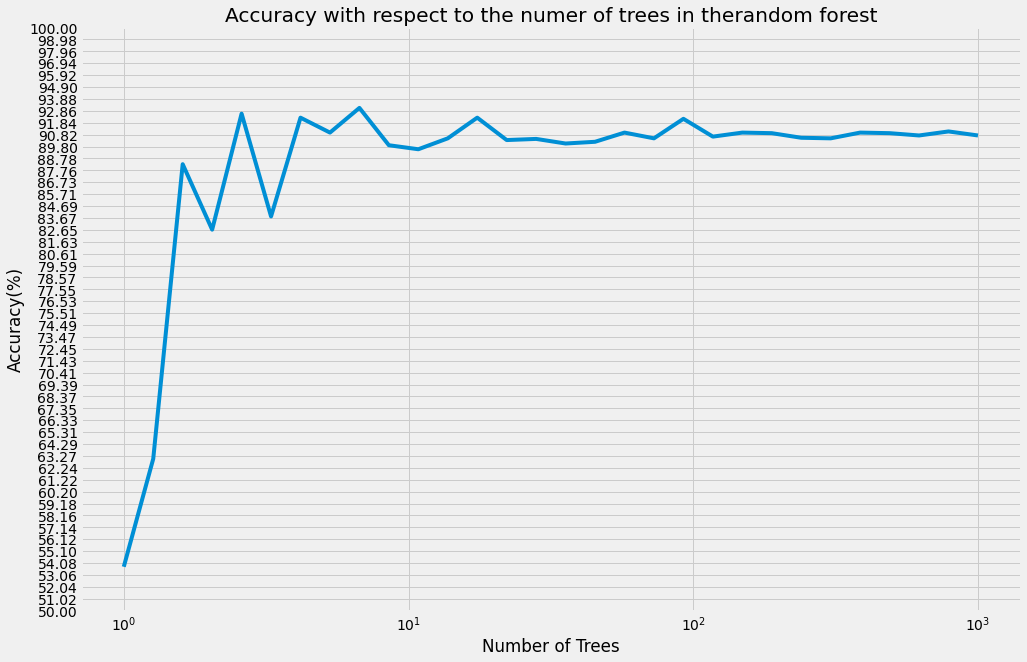

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
ax0 = fig.add_subplot(111)
accuracy = []
for i in range(1,11,1):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))
for i in range(10,110,10):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))
for i in range(100,1100,100):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))
print(accuracy)
ax0.plot(np.logspace(0,3,30),accuracy)
ax0.set_yticks(np.linspace(50,100,50))
ax0.set_title("Accuracy with respect to the numer of trees in therandom forest")
ax0.set_xscale('log')
ax0.set_xlabel("Number of Trees")
ax0.set_ylabel('Accuracy(%)')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Encode the feature values which are strings to integers
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])
X = dataset.drop(['target'],axis=1)
Y = dataset['target']
#Instantiate the model with 100 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy")
#Cross validation
accuracy = cross_validate(Random_Forest_model,X,Y,cv=10)['test_score']
print('The accuracy is: ',sum(accuracy)/len(accuracy)*100,'%')

The accuracy is:  100.0 %
